# Analyse von hoch-augelösten, globalen ICON Simulationen 

## Inhalt

Dieses Jupyter Notebook zeigt wie man globale ICON Simulationsdaten lädt und plottet.

 * [__Jupyter Notebook__](https://www.youtube.com/watch?v=tpLk-FC9kHI) ist eine Browser-basierte Programmierlösung, um wissenschaftliche Daten mit der Programmiersprache `Python` zu analysieren.
 * __Python__ ist eine Programmiersprache, die man leicht erlernen kann
 * [__ICON__](https://www.dwd.de/DE/forschung/wettervorhersage/num_modellierung/01_num_vorhersagemodelle/icon_beschreibung.html?nn=19912) ist ein Computermodell für die Atmosphäre (Wolken & Wetter).

## Importieren von Modulen

Python arbeitet mit Modulen, die importiert werden, um bestimmte Aufgaben einfacher zu machen 

In [22]:
%matplotlib inline
# das führt zu Bildern, die direkt im Notebook stehen

import numpy as np  # Standard Bibliothek für mathematische Operationen
import pylab as plt # Standard Bibliothek für Plots
import cartopy.crs as ccrs # Bibliothek für Karten / Kartographie
import xarray as xr  # Einlesen von Daten (speziell gut für wissenschaftliche Daten im netCDF-Format )

## Daten einlesen

### Plan

Folgendes muss gemacht werden:
 
 * Finde raus, wo die Daten liegen (oder kopiere die Daten in dein Dateisystem)!
 * Setze den Pfad zu den Daten!
 * Öffne die Daten mit `Xarray`!

### Pfad setzen 

In [2]:
# Das ist mein Pfad - der muss geändert werden!
datei_pfad = '/vols/fs1/store/senf/data/dyamond/ICON-5km-fix-sst-conv-new'


### Daten öffnen 

In [3]:
dateien_liste = '%s/2D_dyamond_accu_DOM01_ML_0[2-3]*_1x1deg.nc' % datei_pfad

In [4]:
icon_daten = xr.open_mfdataset( dateien_liste, combine = 'by_coords')

## Daten anschauen

### Allgemein

In [5]:
print( icon_daten )

<xarray.Dataset>
Dimensions:       (lat: 180, lon: 360, time: 200)
Coordinates:
  * lon           (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
  * lat           (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * time          (time) datetime64[ns] 2016-08-03T01:45:00 ... 2016-08-05T03:30:00
Data variables:
    ACCTHB_T      (time, lat, lon) float32 dask.array<chunksize=(1, 180, 360), meta=np.ndarray>
    ACCSOB_T      (time, lat, lon) float32 dask.array<chunksize=(1, 180, 360), meta=np.ndarray>
    SODT_RAD      (time, lat, lon) float32 dask.array<chunksize=(1, 180, 360), meta=np.ndarray>
    ACCTHB_S      (time, lat, lon) float32 dask.array<chunksize=(1, 180, 360), meta=np.ndarray>
    THUS_RAD      (time, lat, lon) float32 dask.array<chunksize=(1, 180, 360), meta=np.ndarray>
    ACCSOB_S      (time, lat, lon) float32 dask.array<chunksize=(1, 180, 360), meta=np.ndarray>
    param198.4.0  (time, lat, lon) float32 dask.array<chunksize=(1, 180, 360), meta=

Da stehen viele Variablen drin, z.B. `ACCTHB_T`. Aber auch Koordinaten wie `time`oder `lon` sind enthalten.

### Koordinaten

Erst schauen wir auf die Zeit. Sie steht in der `icon_daten.time` Variable.

In [6]:
icon_daten.time

<xarray.DataArray 'time' (time: 200)>
array(['2016-08-03T01:45:00.000000000', '2016-08-03T02:00:00.000000000',
       '2016-08-03T02:15:00.000000000', '2016-08-03T02:30:00.000000000',
       '2016-08-03T02:45:00.000000000', '2016-08-03T03:00:00.000000000',
       '2016-08-03T03:15:00.000000000', '2016-08-03T03:30:00.000000000',
       '2016-08-03T03:45:00.000000000', '2016-08-03T04:00:00.000000000',
       '2016-08-03T04:15:00.000000000', '2016-08-03T04:30:00.000000000',
       '2016-08-03T04:45:00.000000000', '2016-08-03T05:00:00.000000000',
       '2016-08-03T05:15:00.000000000', '2016-08-03T05:30:00.000000000',
       '2016-08-03T05:45:00.000000000', '2016-08-03T06:00:00.000000000',
       '2016-08-03T06:15:00.000000000', '2016-08-03T06:30:00.000000000',
       '2016-08-03T06:45:00.000000000', '2016-08-03T07:00:00.000000000',
       '2016-08-03T07:15:00.000000000', '2016-08-03T07:30:00.000000000',
       '2016-08-03T07:45:00.000000000', '2016-08-03T08:00:00.000000000',
       '2016-

Okay, die Daten sind aller 15 Minuten gespeichert und gehen über mehrere Tage.

In [7]:
icon_daten.lon

<xarray.DataArray 'lon' (lon: 360)>
array([  0.,   1.,   2., ..., 357., 358., 359.])
Coordinates:
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
Attributes:
    standard_name:  longitude
    long_name:      longitude
    units:          degrees_east
    axis:           X

Die geographische Länge in Grad.

In [8]:
icon_daten.lat

<xarray.DataArray 'lat' (lat: 180)>
array([-89.5, -88.5, -87.5, -86.5, -85.5, -84.5, -83.5, -82.5, -81.5, -80.5,
       -79.5, -78.5, -77.5, -76.5, -75.5, -74.5, -73.5, -72.5, -71.5, -70.5,
       -69.5, -68.5, -67.5, -66.5, -65.5, -64.5, -63.5, -62.5, -61.5, -60.5,
       -59.5, -58.5, -57.5, -56.5, -55.5, -54.5, -53.5, -52.5, -51.5, -50.5,
       -49.5, -48.5, -47.5, -46.5, -45.5, -44.5, -43.5, -42.5, -41.5, -40.5,
       -39.5, -38.5, -37.5, -36.5, -35.5, -34.5, -33.5, -32.5, -31.5, -30.5,
       -29.5, -28.5, -27.5, -26.5, -25.5, -24.5, -23.5, -22.5, -21.5, -20.5,
       -19.5, -18.5, -17.5, -16.5, -15.5, -14.5, -13.5, -12.5, -11.5, -10.5,
        -9.5,  -8.5,  -7.5,  -6.5,  -5.5,  -4.5,  -3.5,  -2.5,  -1.5,  -0.5,
         0.5,   1.5,   2.5,   3.5,   4.5,   5.5,   6.5,   7.5,   8.5,   9.5,
        10.5,  11.5,  12.5,  13.5,  14.5,  15.5,  16.5,  17.5,  18.5,  19.5,
        20.5,  21.5,  22.5,  23.5,  24.5,  25.5,  26.5,  27.5,  28.5,  29.5,
        30.5,  31.5,  32.5,  33.5,  34.5

Die geographische Breite ebenfalls in Grad.

## Zeit auswählen

Wir wählen einfach erst mal einen Tag aus.

In [9]:
tag = '2016-08-04'

Die Schreibweise ist `Jahr-Monat-Tag`, d.h. oben steht der 4. August 2016, klar oder?

In [10]:
icon_daten_tag = icon_daten.sel( time = tag )
icon_daten_tag = icon_daten_tag.chunk( {'time': 96 } )
print( icon_daten_tag )

<xarray.Dataset>
Dimensions:       (lat: 180, lon: 360, time: 96)
Coordinates:
  * lon           (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
  * lat           (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * time          (time) datetime64[ns] 2016-08-04 ... 2016-08-04T23:45:00
Data variables:
    ACCTHB_T      (time, lat, lon) float32 dask.array<chunksize=(96, 180, 360), meta=np.ndarray>
    ACCSOB_T      (time, lat, lon) float32 dask.array<chunksize=(96, 180, 360), meta=np.ndarray>
    SODT_RAD      (time, lat, lon) float32 dask.array<chunksize=(96, 180, 360), meta=np.ndarray>
    ACCTHB_S      (time, lat, lon) float32 dask.array<chunksize=(96, 180, 360), meta=np.ndarray>
    THUS_RAD      (time, lat, lon) float32 dask.array<chunksize=(96, 180, 360), meta=np.ndarray>
    ACCSOB_S      (time, lat, lon) float32 dask.array<chunksize=(96, 180, 360), meta=np.ndarray>
    param198.4.0  (time, lat, lon) float32 dask.array<chunksize=(96, 180, 360), meta=np.

Mit `icon_daten.sel` können Datenbereiche ausgewählt werden (siehe [Link](http://xarray.pydata.org/en/stable/indexing.html#indexing-with-dimension-names))

96 Zeitschritte. Das kommt von 4 Datenfeldern pro Stunde und 24 Stunden pro Tag.

In [11]:
24 * 4 

96

Auch klar, oder?

## Variablen genauer anschauen

Zwei Variablen repräsentieren Strahlungsflüsse am Oberrand der Atmosphäre (wo auch immer der nun wieder liegt ...).

Die Variablen heißen:

 * `ACCTHB_T`
 * `ACCSOB_T`

Wir schauen mal genauer hin:

In [12]:
print(icon_daten_tag['ACCTHB_T'])

<xarray.DataArray 'ACCTHB_T' (time: 96, lat: 180, lon: 360)>
dask.array<rechunk-merge, shape=(96, 180, 360), dtype=float32, chunksize=(96, 180, 360), chunktype=numpy.ndarray>
Coordinates:
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * time     (time) datetime64[ns] 2016-08-04 ... 2016-08-04T23:45:00
Attributes:
    standard_name:  toa_outgoing_longwave_flux
    long_name:      Net long wave radiation flux  - accumulated _ model top
    units:          W m-2
    param:          5.5.0
    level_type:     toa


Das ist der Strahlungsfluss der thermischen (oder infraroten) Ausstrahlung, der nach oben geht. Die Erde strahlt mit ihrer eigenen Temperatur (siehe [Wärmestrahlung](https://de.wikipedia.org/wiki/Wärmestrahlung)).

__Interpretation__: Das Wort `accumulated` (im `long_name` Attribut) bedeutet, dass die Strahlungsleistung pro Fläche (Watt pro Quadradmeter) aufsummiert wird und so die "akkumulierte" Strahlungsenergie pro Fläche (Joule pro Quadradmeter) abgespeichert wird. 

Achtung: Das Attribut `units` ist also falsch. Da müsste `J m-2` stehen!

In [13]:
print(icon_daten_tag['ACCSOB_T'])

<xarray.DataArray 'ACCSOB_T' (time: 96, lat: 180, lon: 360)>
dask.array<rechunk-merge, shape=(96, 180, 360), dtype=float32, chunksize=(96, 180, 360), chunktype=numpy.ndarray>
Coordinates:
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * time     (time) datetime64[ns] 2016-08-04 ... 2016-08-04T23:45:00
Attributes:
    long_name:   Net short wave radiation flux - accumulated _ model top
    units:       W m-2
    param:       9.4.0
    level_type:  toa


Das ist der akkumulierte Strahlungsfluss im solaren Bereich (also durch sichtbare [Sonnenstrahlung](https://de.wikipedia.org/wiki/Sonnenstrahlung) bestimmt). Auch hier sollte die Einheit `J m-2` sein.

Wir nehmen nur die beiden Strahlungsvariablen:

In [14]:
icon_akku_strahlung = icon_daten_tag[['ACCSOB_T', 'ACCTHB_T']]

## Strahlungsflüsse

Um einen Strahlungsfluss aus unseren Daten zu erhalten, muss also die Strahlungsenergie (pro Fläche) zu zwei Zeiten (jetzt und 15 min früher) betrachtet werden. Berechnet man die Differenz der beiden Strahlungsenergien, so bekommt man die Energie, die innerhalb von 15 min dazu gekommen ist. Dividiert man diese Differenz noch durch das Zeitinterval bekommt man eine momentane Strahlungsleistung pro Fläche.

Wir nehmen die `xarray`-Methode `differentiate`. Mit ihr können wir ganz einfach Differenzen berechnen.

In [17]:
icon_strahlungsfluss = icon_akku_strahlung.differentiate('time', datetime_unit = 's')

Ich glaube, es wäre auch schöner die Strahlungsflüsse umzubenennen. Üblich sind englische Kürzel für "shortwave flux" (swf) und "longwave flux" (lwf). Wir nehmen dafür die Methode `icon_strahlungsfluss.rename_vars` und müssen ein "Dictionary" übergeben, dass alte in neue Namen abbildet.

In [18]:
icon_strahlungsfluss = icon_strahlungsfluss.rename_vars({'ACCSOB_T' : 'swf', 'ACCTHB_T' : 'lwf'})

In [19]:
print( icon_strahlungsfluss )

<xarray.Dataset>
Dimensions:  (lat: 180, lon: 360, time: 96)
Coordinates:
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * time     (time) datetime64[ns] 2016-08-04 ... 2016-08-04T23:45:00
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
Data variables:
    swf      (time, lat, lon) float32 dask.array<chunksize=(96, 180, 360), meta=np.ndarray>
    lwf      (time, lat, lon) float32 dask.array<chunksize=(96, 180, 360), meta=np.ndarray>
Attributes:
    CDI:                       Climate Data Interface version 1.9.7.1 (http:/...
    history:                   Sat Nov 30 01:26:57 2019: cdo -P 4 -z zip_4 -r...
    institution:               European Centre for Medium-Range Weather Forec...
    Conventions:               CF-1.6
    CDO:                       Climate Data Operators version 1.9.7.1 (http:/...
    cdo_openmp_thread_number:  4


So, die Daten sehen doch ganz gut aus!

## Plots für einen Zeitpunkt

Wir wollen für einen Zeitpunkt, die Strahlungsflüsse in eine Karte plotten. 

 * Zeitpunkt und Feld wählen
 * Karte plotten

### Langwellig

In [36]:
zeit_punkt = '2016-08-04 12:00'
variable = icon_strahlungsfluss['lwf'].sel(time = zeit_punkt)

Text(0.5, 0.98, 'Langwelliger Strahlungsfluss ($W / m^2$)')

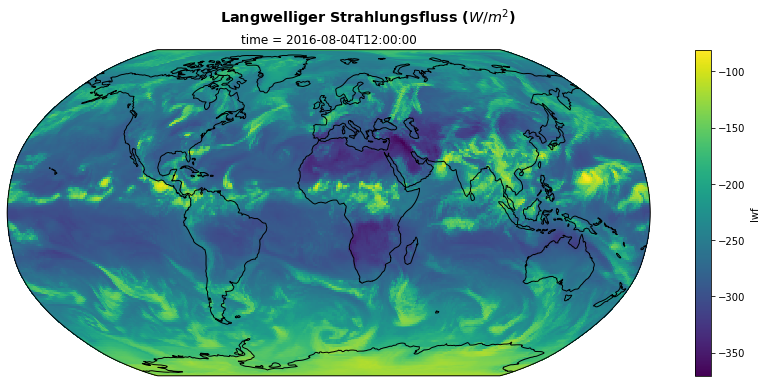

In [37]:
fig = plt.figure(figsize=(16, 6))

ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson())
ax.coastlines()
ax.set_global()
crs = ccrs.PlateCarree()

variable.plot.pcolormesh( ax = ax, transform = crs )
plt.suptitle('Langwelliger Strahlungsfluss ($W / m^2$)', fontsize = 'x-large', fontweight = 'bold' )


### Kurzwellig

In [38]:
zeit_punkt = '2016-08-04 12:00'
variable = icon_strahlungsfluss['swf'].sel(time = zeit_punkt)

Text(0.5, 0.98, 'Kurzwelliger Strahlungsfluss ($W / m^2$)')

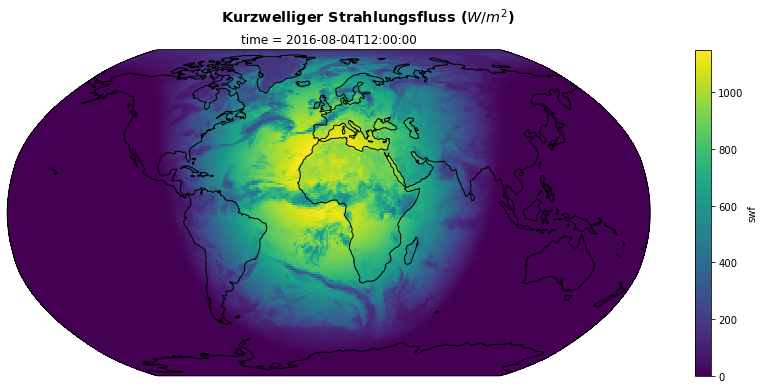

In [42]:
fig = plt.figure(figsize=(16, 6))

ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson())
ax.coastlines()
ax.set_global()
crs = ccrs.PlateCarree()

variable.plot.pcolormesh( ax = ax, transform = crs )
plt.suptitle('Kurzwelliger Strahlungsfluss ($W / m^2$)', fontsize = 'x-large', fontweight = 'bold' )


Was siehst Du? Verstehst Du die Unterschiede?

## Plots für einen ganzen Tag

Wir wollen für einen ganzen Tag, die Strahlungsflüsse in eine Karte plotten. 

 * Feld wählen und Mittelwert bilden
 * Karte plotten

### Langwellig

In [43]:
variable = icon_strahlungsfluss['lwf'].mean('time')

Text(0.5, 0.98, 'Langwelliger Strahlungsfluss ($W / m^2$)')

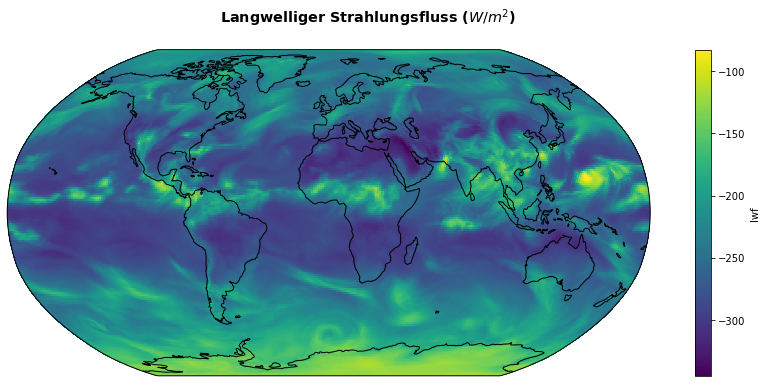

In [44]:
fig = plt.figure(figsize=(16, 6))

ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson())
ax.coastlines()
ax.set_global()
crs = ccrs.PlateCarree()

variable.plot.pcolormesh( ax = ax, transform = crs )
plt.suptitle('Langwelliger Strahlungsfluss ($W / m^2$)', fontsize = 'x-large', fontweight = 'bold' )


### Kurzwellig

In [45]:
variable = icon_strahlungsfluss['swf'].mean('time')

Text(0.5, 0.98, 'Kurzwelliger Strahlungsfluss ($W / m^2$)')

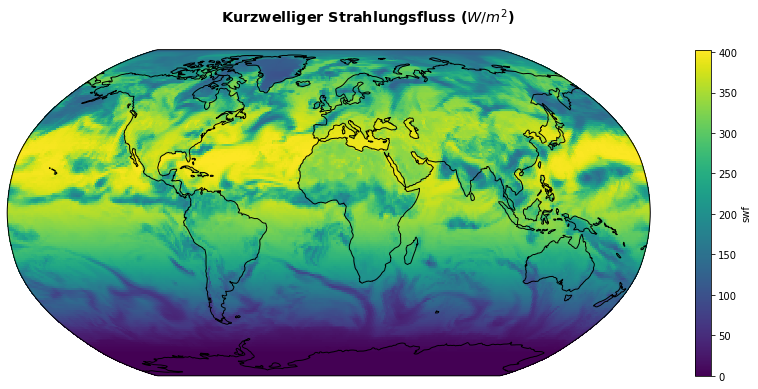

In [46]:
fig = plt.figure(figsize=(16, 6))

ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson())
ax.coastlines()
ax.set_global()
crs = ccrs.PlateCarree()

variable.plot.pcolormesh( ax = ax, transform = crs )
plt.suptitle('Kurzwelliger Strahlungsfluss ($W / m^2$)', fontsize = 'x-large', fontweight = 'bold' )


Was siehst Du jetzt? 

Vergleiche mit den Abbildungen oben!

